In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_list=os.listdir("/content/drive/MyDrive/ML Major/AnyConv.com__puffy eyes (2)")

In [ ]:
folder_list

['puffy eyes', 'No puffy eyes']

In [ ]:
features_train=[]
target_train=[]
for folder in folder_list:
    ImgNames_list=os.listdir("/content/drive/MyDrive/ML Major/AnyConv.com__puffy eyes (2)"+"/"+folder)
    print("In Folder : ",folder)
    for imgName in ImgNames_list:
        Imgarr=cv2.imread("/content/drive/MyDrive/ML Major/AnyConv.com__puffy eyes (2)"+"/"+folder+"/"+imgName)
        # there might be images of size less than 100 by 100 and so error occurs
        try:
            Imgarr=cv2.resize(Imgarr,(100,100))
        except: 
            pass
        else:
            features_train.append(Imgarr)
            if folder=="No puffy eyes":
                target_train.append(0)
            else:
                target_train.append(1)

In Folder :  puffy eyes
In Folder :  No puffy eyes


In [ ]:
features_train=np.array(features_train)
target_train=np.array(target_train)

In [ ]:
features_train.shape

(500, 100, 100, 3)

In [ ]:
target_train.shape

(500,)

In [ ]:
features_train.ndim

4

In [ ]:
target_train.ndim

1

In [ ]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [ ]:
features_train=np.array(list(map(preprocessing,features_train)))

In [ ]:
features_train.shape

(500, 100, 100)

In [ ]:
features_train=features_train.reshape(500, 100, 100,1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [ ]:
dataGen.fit(features_train)

In [ ]:
batches=dataGen.flow(features_train,target_train,batch_size=5)

In [ ]:
len(batches)

100

In [ ]:
images,labels=next(batches)

In [ ]:
images.ndim

4

In [ ]:
labels.shape

(5,)

In [ ]:
images.shape

(5, 100, 100, 1)

In [ ]:
import matplotlib.pyplot as plt

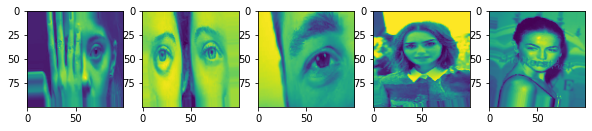

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i].reshape(100,100))
plt.show()

In [ ]:
features_train.shape

(500, 100, 100, 1)

In [ ]:
target_train.shape

(500,)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
target_train=to_categorical(target_train)

In [ ]:
target_train.shape

(500, 2)

In [ ]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Conv2D(120,(3,3),activation="relu",input_shape=(100,100,1)))
model.add(Conv2D(120,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

#model.add(Dropout(0.5)) # for overfitting model

model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax")) 

In [ ]:
from keras.optimizers import Adam

In [ ]:
model.compile(Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(dataGen.flow(features_train,target_train,batch_size=5),epochs=50)

Epoch 1/50
100/100 [==============================] - 45s 17ms/step - loss: 0.6548 - accuracy: 0.5985
Epoch 2/50
100/100 [==============================] - 2s 17ms/step - loss: 0.5058 - accuracy: 0.7615
Epoch 3/50
100/100 [==============================] - 2s 17ms/step - loss: 0.4638 - accuracy: 0.7901
Epoch 4/50
100/100 [==============================] - 2s 17ms/step - loss: 0.3711 - accuracy: 0.8412
Epoch 5/50
100/100 [==============================] - 2s 17ms/step - loss: 0.3938 - accuracy: 0.8147
Epoch 6/50
100/100 [==============================] - 2s 17ms/step - loss: 0.3285 - accuracy: 0.8676
Epoch 7/50
100/100 [==============================] - 2s 17ms/step - loss: 0.3034 - accuracy: 0.8690
Epoch 8/50
100/100 [==============================] - 2s 17ms/step - loss: 0.3129 - accuracy: 0.8676
Epoch 9/50
100/100 [==============================] - 2s 17ms/step - loss: 0.2746 - accuracy: 0.8846
Epoch 10/50
100/100 [==============================] - 2s 17ms/step - loss: 0.2767 - accur

In [ ]:
model_json=model.to_json() # converted to json file
with open("Puffy.json","w") as abc:
    abc.write(model_json)
    abc.close()
model.save_weights("PuffyWeights.h5") # saving weights as hdf 5 file
print("Save the Model")

Save the Model


In [ ]:
from keras.models import model_from_json
json_file=open("Puffy.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("PuffyWeights.h5")
print("Loaded model successfully")

Loaded model successfully


In [ ]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [ ]:
def getClassName(classNo):
    if classNo == 0: return "No Puffy Eyes"
    elif classNo == 1: return "Puffy Eyes"